# Fundamentals-Assessment

Submitted by Paula Daly - G00058661

This jupyter notebook contains my analysis of the tips dataset which is inbuilt into the Python Seaborn package.
The Python Seaborn library is used to ease the challenging task of data visualization and it’s based on Matplotlib. Seaborn allows the creation of statistical graphics through the following functionalities:

 - An API that is based on datasets allowing comparison between multiple variables

 - Supports multi-plot grids that in turn ease building complex visualizations

 - Univariate and bivariate visualizations available to compare between subsets of data

 - Availability of different color palettes to reveal various kinds of patterns

 - Estimates and plots linear regression automatically

## Viewing the tips dataset

To work on the dataset I will be using the powerful libraries that are available with Python, these libraries have ready made functions that can accomplish all I need to analyse the tips dataset.  The libraries that I'll be using are:
 - pandas - Data Structure library, structures information in rows and columns and helps you rearrange and navigate the data.
 - numpy - Numerical library, performs many mathematical operations and handles arrays. Pandas is actually built on top of numpy, we will use it primarily for generates arrays of numbers and basic mathematical operations.
 - matplotlib - Plotting Library, makes plots for many situations and has deep customization possibilities. Useful in wide variety of contexts.
 - seaborn - Statistical plotting library. Similar to matplotlib in that it is a plotting library, seaborn produces nice visualizations eliminating much of the work necessary for producing similar visualizations with matplotlib.

In [64]:
# Import Pandas for managing datasets
# Import matplotlib for additional customisation
# Import Seaborn for plotting and styling
# Import Sklearn for linear Regression
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

After all the libraries are imported I will now load the dataset.

In [65]:
# Load the tips dataset from Seaborn
tips = sns.load_dataset("tips")

Once the dataset is loaded I want to take a look at the dataset to get a good picture of what is in the dataset.

In [66]:
# Column names
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [67]:
# look at first five rows of dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [68]:
# look at last five rows of dataset
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [69]:
# Overview of the dataset
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The Describe function helps me see that the average total_bill is 19.79 (rounded to two decimal places) and that the average tip is 3.00 (rounded to 2 decimal places).

To explore the dataset further I'm going to view different some of the different subsets of the dataset, for this I'm going to group by sex and smoker.

In [70]:
# Groups the dataset by the sex column
sex = tips.groupby("sex")

In [71]:
sex.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3


In [72]:
# Total amounts for total_bill and tip
sex.sum()

,total_bill,tip,size
sex,,,
Male,3256.82,485.07,413
Female,1570.95,246.51,214


In [73]:
# Take a look at the average total_bill and tip for a smoker
sex.mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [74]:
# View the smokers
smoker = tips.groupby("smoker")

In [75]:
smoker.first()

,total_bill,tip,sex,day,time,size
smoker,,,,,,
Yes,38.01,3.00,Male,Sat,Dinner,4
No,16.99,1.01,Female,Sun,Dinner,2


In [76]:
smoker.last()

,total_bill,tip,sex,day,time,size
smoker,,,,,,
Yes,22.67,2.0,Male,Sat,Dinner,2
No,18.78,3.0,Female,Thur,Dinner,2


In [77]:
# Total amounts for total_bill and tip depending on smoker or non smoker
smoker.sum()

,total_bill,tip,size
smoker,,,
Yes,1930.34,279.81,224
No,2897.43,451.77,403


In [78]:
# Take a look at the average total_bill and tip for a smoker and non smoker
smoker.mean()

,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


I continued on to use the Slice and Dice to help me get a better picture of the data

In [79]:
# View based on a numeric location
tips.iloc[5:20]

,total_bill,tip,sex,smoker,day,time,size
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4
12,15.42,1.57,Male,No,Sun,Dinner,2
13,18.43,3.00,Male,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2


In [80]:
# Average tip based on Female
tips.loc[tips["sex"]=="Female"].mean()

total_bill    18.056897
tip            2.833448
size           2.459770
dtype: float64

In [81]:
# Average tip based on non-smoker
tips.loc[tips["sex"]=="Male"].mean()

total_bill    20.744076
tip            3.089618
size           2.630573
dtype: float64

In [82]:
# Average tip based on smokers
tips.loc[tips["smoker"]=="Yes"].mean()

total_bill    20.756344
tip            3.008710
size           2.408602
dtype: float64

This shows that the average bill for Smokers is 20.76 and the average tip is 3.00

In [83]:
# Average tip based on non-smoker
tips.loc[tips["smoker"]=="No"].mean()

total_bill    19.188278
tip            2.991854
size           2.668874
dtype: float64

This shows that the average bill for non smokers is 19.19 and the average tip is 2.99

I want to view the % of the total_bill the tips are.

In [84]:
# Adding % tip column
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050
7,26.88,3.12,Male,No,Sun,Dinner,4,0.116071
8,15.04,1.96,Male,No,Sun,Dinner,2,0.130319
9,14.78,3.23,Male,No,Sun,Dinner,2,0.218539


As I now have the percent column added I'm going to look at the average % of the total_bill the tip is for sex and if smoker or non smoker.

In [85]:
# Grouping the data
grouped = tips.groupby(['sex', 'smoker'])

In [86]:
# Avearage %
grouped.agg('mean')

total_bill       tip      size   tip_pct
sex    smoker                                          
Male   Yes      22.284500  3.051167  2.500000  0.152771
       No       19.791237  3.113402  2.711340  0.160669
Female Yes      17.977879  2.931515  2.242424  0.182150
       No       18.105185  2.773519  2.592593  0.156921

## Linear Regression
Linear Regression is a statistical model that examines the linear relationship between two or more variables.  This means that when one (or more) independent variables increases or decreases the dependent variable increases or decreases.

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points

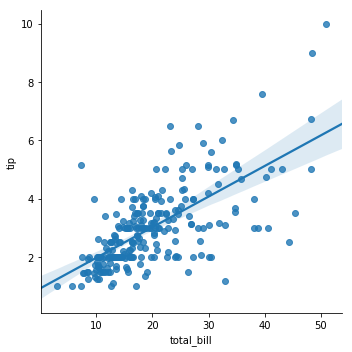

In [87]:
# lmplot visualisation
sns.lmplot(x="total_bill", y="tip", data=tips)
plt.show()

The Linear line across the above plot is the best available fit for the trend of the tip customers give in respect to the total_bill amount.  The data points tare are at the extreme top right which are far away from the linear line are known as outliers in the dataset, these ouliers are exceptions.

When you look closely at the linear line there is a shadow converging at the center where theere is a chunk of the data.  The convergent point is the statistical mean (prediction of the tip value against the total_bill).  In this dataset it appears that the total_bill amount is around 20 and that the tip will be approx 3.

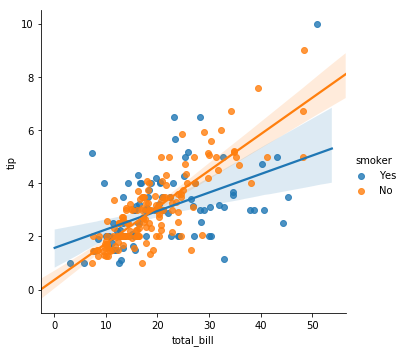

In [88]:
# lmplot visualisation inc. smoker data
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

To take a look at the difference in tips against the total_bill if the person is a smoker or non smoker I added a third parameter of Hue=smoker to the plot.  This plot shows that smokers which are in blue are a little more generous but not so consistent with their tipping as the data points are quite vaguely spread out. 

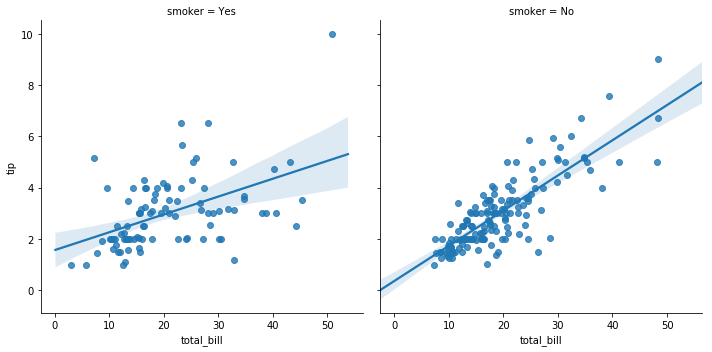

In [89]:
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips)

# Visualising the Tips Dataset

### Histogram
I'm going to use a Histogram to see the frequency of tip amounts.

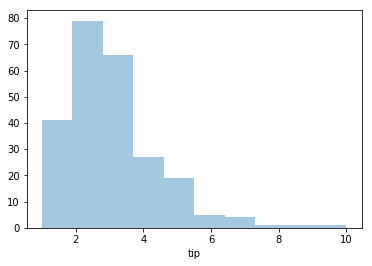

In [90]:
# Histogram
sns.distplot(tips['tip'], kde=False, bins=10);

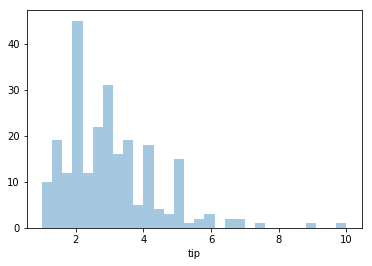

In [91]:
# View with a larger bins value to view a more accurate result
sns.distplot(tips['tip'], kde=False, bins=30);


From the histogram I can see that most of the tips are between 2 and 4.

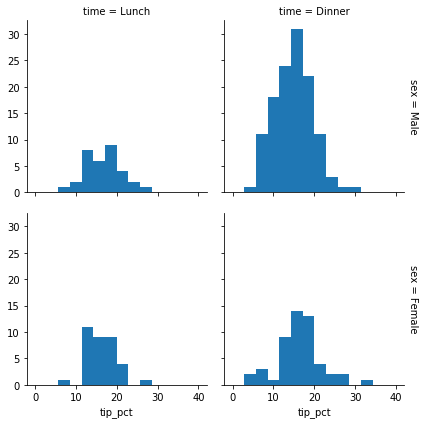

In [92]:
# Tip % if Lunch time or Dinner time
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Kerner Density Estimate (KDE)
KDE is a way to estimpte the probability density function of a continuous random variable.  It is used when you need to know the distribution of the variable

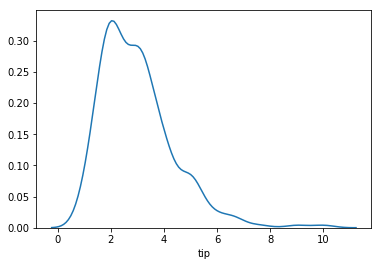

In [93]:
# KDE Plot
sns.distplot(tips['tip'],hist=False, bins=10);

I'll now take a look at the distribution of tips between Male and female and between Smoker and Non Smoker.

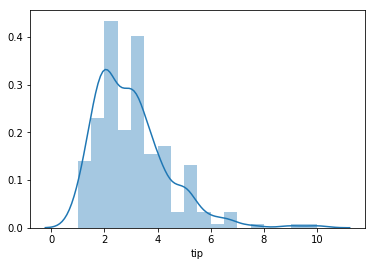

In [94]:
# Distribution plot for tip values
sns.distplot(tips["tip"])

In [95]:
# Distribution plot based on Female and Male customers
Female = tips.loc[tips["sex"] == "Female", ["sex", "tip"]]
Male = tips.loc[tips["sex"] == "Male", ["sex", "tip"]]

In [96]:
Male.head()

,sex,tip
1,Male,1.66
2,Male,3.50
3,Male,3.31
5,Male,4.71
6,Male,2.00


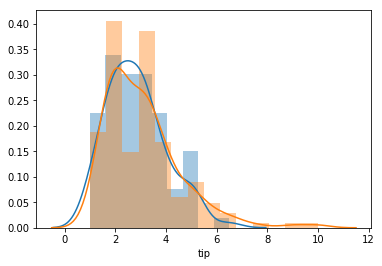

In [97]:
sns.distplot(Female["tip"])
sns.distplot(Male["tip"])

In [98]:
# Distribution plot based on Smoker or non smoker
Smoker = tips.loc[tips["smoker"] == "Yes", ["smoker", "tip"]]
Non_Smoker = tips.loc[tips["smoker"] == "No", ["smoker", "tip"]]

In [99]:
Smoker.head()

,smoker,tip
56,Yes,3.00
58,Yes,1.76
60,Yes,3.21
61,Yes,2.00
62,Yes,1.98


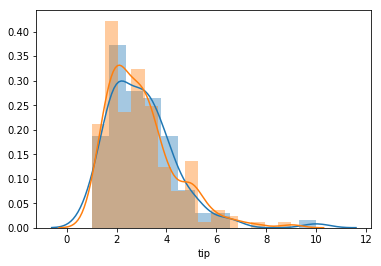

In [100]:
sns.distplot(Smoker["tip"])
sns.distplot(Non_Smoker["tip"])

I also used boxplot to compare the tip amounts if male or female or if smoker or non smoker.

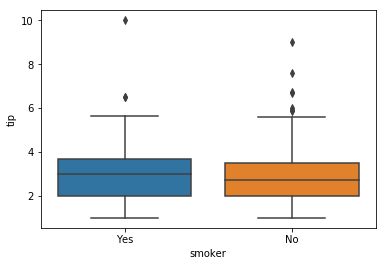

In [101]:
# Boxplot to compare tips if smoker or non-smoker
sns.boxplot(x = "smoker", y = "tip", data = tips)

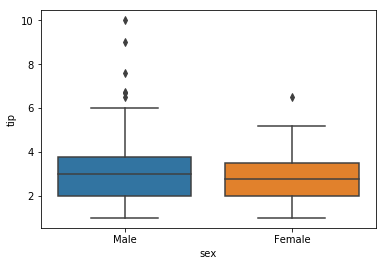

In [102]:
# Boxplot to compare if Male or Female
sns.boxplot(x = "sex", y = "tip", data = tips)

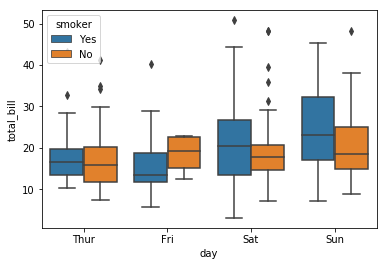

In [103]:
# Boxplot to view the total bill by the days of the week for smokers and non-smokers
sns.boxplot(x = "day", y = "total_bill", hue = "smoker", data = tips)

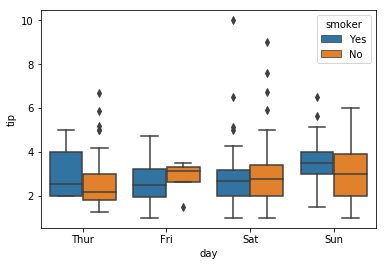

In [104]:
# Boxplot to view the tips by the days of the week for smokers and non-smokers
sns.boxplot(x = "day", y = "tip", hue = "smoker", data = tips)

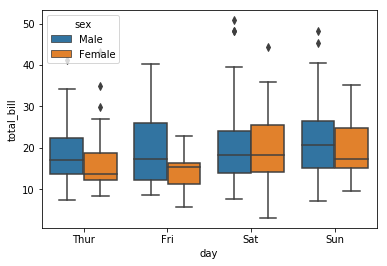

In [105]:
# Boxplot to view the total bill by the days of the week for male and female
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = tips)

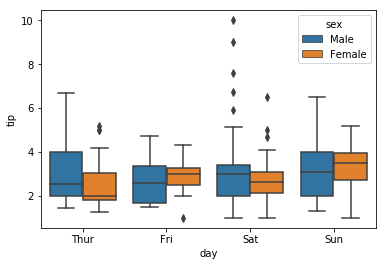

In [106]:
# Boxplot to view the tips by the days of the week for male and female
sns.boxplot(x = "day", y = "tip", hue = "sex", data = tips)

# Pair Plot


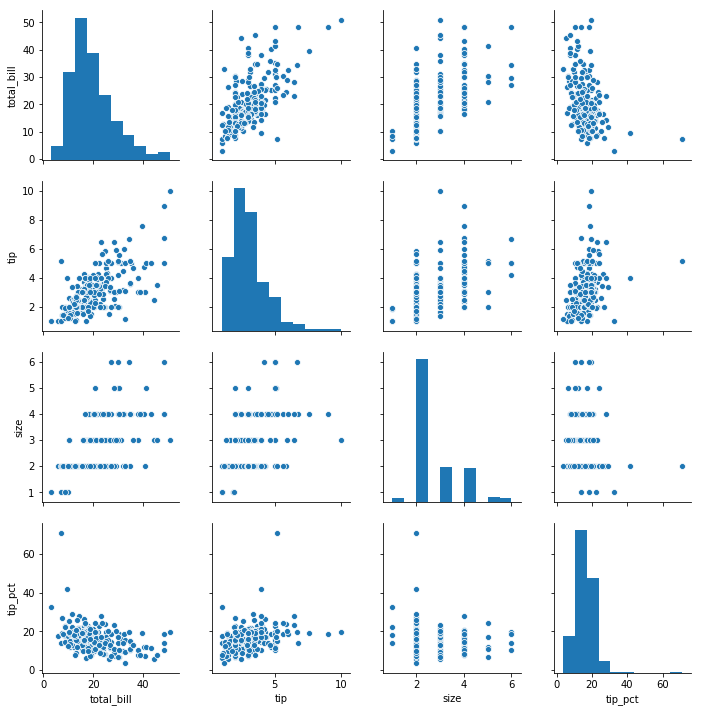

In [107]:
# Visualise the relationship between total_bill and tip
sns.pairplot(tips)

# Conclusion

From my analysis of the tips dataset I found that the average total_bill was 19.79 and the average tip was 3.
In my analyses I investigated the relationship between male and female for tips and if a smoker or non smoker. The results show that women leave a higher tip if they are a smoker. For non smokers males leave a higher tip and this is at dinner time compared to lunch time.
Saturday and Sunday are the days it has shown that the Total_Bill and tips are higher than the other two days that were on the dataset Thursday and Friday
